In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Turnstile Usage Covid 19").getOrCreate()
spark

In [2]:
result_2019 = "Result/Turnstile Usage 2019/result_2019.csv"
turnstile_usage_2019 = spark.read.format("csv").options(header="true", inferschema="true").load(result_2019)

In [3]:
turnstile_usage_2019.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Daily_Entry: long (nullable = true)
 |-- Daily_Exit: double (nullable = true)



In [4]:
turnstile_usage_2019.count()

127655

In [5]:
turnstile_usage_2019.show()

+-------+----------+-----------+----------+
|Station|      Date|Daily_Entry|Daily_Exit|
+-------+----------+-----------+----------+
|   1 AV|01/01/2019|       8867|   10406.0|
|   1 AV|01/02/2019|      18641|   21119.0|
|   1 AV|01/03/2019|      19905|   22646.0|
|   1 AV|01/04/2019|      21176|   24128.0|
|   1 AV|01/05/2019|      14014|   16735.0|
|   1 AV|01/06/2019|      11023|   13015.0|
|   1 AV|01/07/2019|      19716|   22400.0|
|   1 AV|01/08/2019|      20419|   22481.0|
|   1 AV|01/09/2019|      21159|   23471.0|
|   1 AV|01/10/2019|      21172|   23374.0|
|   1 AV|01/11/2019|      22432|   25449.0|
|   1 AV|01/12/2019|      15182|   18238.0|
|   1 AV|01/13/2019|      11074|   13541.0|
|   1 AV|01/14/2019|      19526|   22270.0|
|   1 AV|01/15/2019|      20420|   22627.0|
|   1 AV|01/16/2019|      21033|   23298.0|
|   1 AV|01/17/2019|      21689|   23976.0|
|   1 AV|01/18/2019|      22091|   24774.0|
|   1 AV|01/19/2019|      14433|   17365.0|
|   1 AV|01/20/2019|      10711|

In [6]:
result_2020 = "Result/Turnstile Usage 2020/result_2020.csv"
turnstile_usage_2020 = spark.read.format("csv").options(header="true", inferschema="true").load(result_2020)

In [7]:
turnstile_usage_2020.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Daily_Entry: long (nullable = true)
 |-- Daily_Exit: double (nullable = true)



In [8]:
turnstile_usage_2020.count()

116987

In [9]:
turnstile_usage_2020.show()

+-------+----------+-----------+----------+
|Station|      Date|Daily_Entry|Daily_Exit|
+-------+----------+-----------+----------+
|   1 AV|01/01/2020|       6109|    7588.0|
|   1 AV|01/02/2020|      15692|   18063.0|
|   1 AV|01/03/2020|      16526|   18918.0|
|   1 AV|01/04/2020|       6877|    7765.0|
|   1 AV|01/05/2020|       5021|    5782.0|
|   1 AV|01/06/2020|      16711|   18927.0|
|   1 AV|01/07/2020|      17057|   19701.0|
|   1 AV|01/08/2020|      17668|   20563.0|
|   1 AV|01/09/2020|      18034|   20474.0|
|   1 AV|01/10/2020|      18710|   21325.0|
|   1 AV|01/11/2020|       8015|    8974.0|
|   1 AV|01/12/2020|       5329|    6222.0|
|   1 AV|01/13/2020|      16637|   19261.0|
|   1 AV|01/14/2020|      17533|   20327.0|
|   1 AV|01/15/2020|      17898|   20211.0|
|   1 AV|01/16/2020|      18192|   20696.0|
|   1 AV|01/17/2020|      19065|   22080.0|
|   1 AV|01/18/2020|       5744|    6568.0|
|   1 AV|01/19/2020|       4631|    5372.0|
|   1 AV|01/20/2020|      10533|

In [10]:
# For each station, count total entry number, exit number, entry plus exit number
import pyspark.sql.functions as f

In [11]:
# Change Type
daily_entry_and_exit_2019 = turnstile_usage_2019.select(turnstile_usage_2019.Station, turnstile_usage_2019.Daily_Entry, turnstile_usage_2019.Daily_Exit.cast("long"))

# Sum Entry and Exit number
daily_entry_and_exit_2019 = daily_entry_and_exit_2019.withColumn("Daily_Entry_And_Exit", f.col("Daily_Entry")+f.col("Daily_Exit"))
daily_entry_and_exit_2019.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Daily_Entry: long (nullable = true)
 |-- Daily_Exit: long (nullable = true)
 |-- Daily_Entry_And_Exit: long (nullable = true)



In [12]:
daily_entry_and_exit_2019.count()

127655

In [13]:
daily_entry_and_exit_2019.show()

+-------+-----------+----------+--------------------+
|Station|Daily_Entry|Daily_Exit|Daily_Entry_And_Exit|
+-------+-----------+----------+--------------------+
|   1 AV|       8867|     10406|               19273|
|   1 AV|      18641|     21119|               39760|
|   1 AV|      19905|     22646|               42551|
|   1 AV|      21176|     24128|               45304|
|   1 AV|      14014|     16735|               30749|
|   1 AV|      11023|     13015|               24038|
|   1 AV|      19716|     22400|               42116|
|   1 AV|      20419|     22481|               42900|
|   1 AV|      21159|     23471|               44630|
|   1 AV|      21172|     23374|               44546|
|   1 AV|      22432|     25449|               47881|
|   1 AV|      15182|     18238|               33420|
|   1 AV|      11074|     13541|               24615|
|   1 AV|      19526|     22270|               41796|
|   1 AV|      20420|     22627|               43047|
|   1 AV|      21033|     23

In [14]:
# Data cleaning: keep records that have 0 < entry, exit number < 100,000
clean_result_2019 = daily_entry_and_exit_2019.filter(daily_entry_and_exit_2019.Daily_Entry > 0).filter(daily_entry_and_exit_2019.Daily_Exit > 0).filter(daily_entry_and_exit_2019.Daily_Entry < 100000).filter(daily_entry_and_exit_2019.Daily_Exit < 100000)

# Calculate total entry and exit number per station
total_count_per_station_2019 = clean_result_2019.groupBy("Station").sum("Daily_Entry", "Daily_Exit", "Daily_Entry_And_Exit")
total_count_per_station_2019 = total_count_per_station_2019.select("Station", f.col("sum(Daily_Entry)").alias("Total_Entry"), f.col("sum(Daily_Exit)").alias("Total_Exit"), f.col("sum(Daily_Entry_And_Exit)").alias("Total_Entry_And_Exit")).sort("Station")
total_count_per_station_2019.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Total_Entry: long (nullable = true)
 |-- Total_Exit: long (nullable = true)
 |-- Total_Entry_And_Exit: long (nullable = true)



In [15]:
total_count_per_station_2019.count()

379

In [16]:
total_count_per_station_2019.show()

+---------------+-----------+----------+--------------------+
|        Station|Total_Entry|Total_Exit|Total_Entry_And_Exit|
+---------------+-----------+----------+--------------------+
|           1 AV|    4910147|   5504531|            10414678|
|         103 ST|    3582364|   2343085|             5925449|
|  103 ST-CORONA|    5922035|   4434007|            10356042|
|         104 ST|     396804|    118219|              515023|
|         110 ST|    3252237|   2964419|             6216656|
|         111 ST|    4004960|   2460057|             6465017|
|         116 ST|    3927609|   2639699|             6567308|
|116 ST-COLUMBIA|    4264604|   2155672|             6420276|
|         121 ST|     682108|    445620|             1127728|
|         125 ST|   10210120|   8857078|            19067198|
|         135 ST|    4029307|   1378776|             5408083|
|137 ST CITY COL|    3791181|   3413520|             7204701|
| 138/GRAND CONC|    1029907|    900976|             1930883|
|       

In [17]:
# Change Type
daily_entry_and_exit_2020 = turnstile_usage_2020.select(turnstile_usage_2020.Station, turnstile_usage_2020.Daily_Entry, turnstile_usage_2020.Daily_Exit.cast("long"))

# Sum Entry and Exit number
daily_entry_and_exit_2020 = daily_entry_and_exit_2020.withColumn("Daily_Entry_And_Exit", f.col("Daily_Entry")+f.col("Daily_Exit"))
daily_entry_and_exit_2020.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Daily_Entry: long (nullable = true)
 |-- Daily_Exit: long (nullable = true)
 |-- Daily_Entry_And_Exit: long (nullable = true)



In [18]:
daily_entry_and_exit_2020.count()

116987

In [19]:
daily_entry_and_exit_2020.show()

+-------+-----------+----------+--------------------+
|Station|Daily_Entry|Daily_Exit|Daily_Entry_And_Exit|
+-------+-----------+----------+--------------------+
|   1 AV|       6109|      7588|               13697|
|   1 AV|      15692|     18063|               33755|
|   1 AV|      16526|     18918|               35444|
|   1 AV|       6877|      7765|               14642|
|   1 AV|       5021|      5782|               10803|
|   1 AV|      16711|     18927|               35638|
|   1 AV|      17057|     19701|               36758|
|   1 AV|      17668|     20563|               38231|
|   1 AV|      18034|     20474|               38508|
|   1 AV|      18710|     21325|               40035|
|   1 AV|       8015|      8974|               16989|
|   1 AV|       5329|      6222|               11551|
|   1 AV|      16637|     19261|               35898|
|   1 AV|      17533|     20327|               37860|
|   1 AV|      17898|     20211|               38109|
|   1 AV|      18192|     20

In [20]:
# data cleaning: keep records that have 0 < entry, exit number < 100,000
clean_result_2020 = daily_entry_and_exit_2020.filter(daily_entry_and_exit_2020.Daily_Entry > 0).filter(daily_entry_and_exit_2020.Daily_Exit > 0).filter(daily_entry_and_exit_2020.Daily_Entry < 100000).filter(daily_entry_and_exit_2020.Daily_Exit < 100000)

# Calculate total entry and exit number per station
total_count_per_station_2020 = clean_result_2020.groupBy("Station").sum("Daily_Entry", "Daily_Exit", "Daily_Entry_And_Exit")
total_count_per_station_2020 = total_count_per_station_2020.select("Station", f.col("sum(Daily_Entry)").alias("Total_Entry"), f.col("sum(Daily_Exit)").alias("Total_Exit"), f.col("sum(Daily_Entry_And_Exit)").alias("Total_Entry_And_Exit")).sort("Station")
total_count_per_station_2020.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Total_Entry: long (nullable = true)
 |-- Total_Exit: long (nullable = true)
 |-- Total_Entry_And_Exit: long (nullable = true)



In [21]:
total_count_per_station_2020.count()

379

In [22]:
total_count_per_station_2020.show()

+---------------+-----------+----------+--------------------+
|        Station|Total_Entry|Total_Exit|Total_Entry_And_Exit|
+---------------+-----------+----------+--------------------+
|           1 AV|    1806749|   2348514|             4155263|
|         103 ST|    1232622|    931295|             2163917|
|  103 ST-CORONA|    2802057|   2508798|             5310855|
|         104 ST|     278365|    156705|              435070|
|         110 ST|    1275480|   1479745|             2755225|
|         111 ST|    1943893|   1191962|             3135855|
|         116 ST|    1831268|   1577228|             3408496|
|116 ST-COLUMBIA|    1123894|    729206|             1853100|
|         121 ST|     285048|    198246|              483294|
|         125 ST|    4242216|   4594113|             8836329|
|         135 ST|    1530231|    675352|             2205583|
|137 ST CITY COL|    1487914|   1684400|             3172314|
| 138/GRAND CONC|     309040|    312661|              621701|
|       

In [23]:
# Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

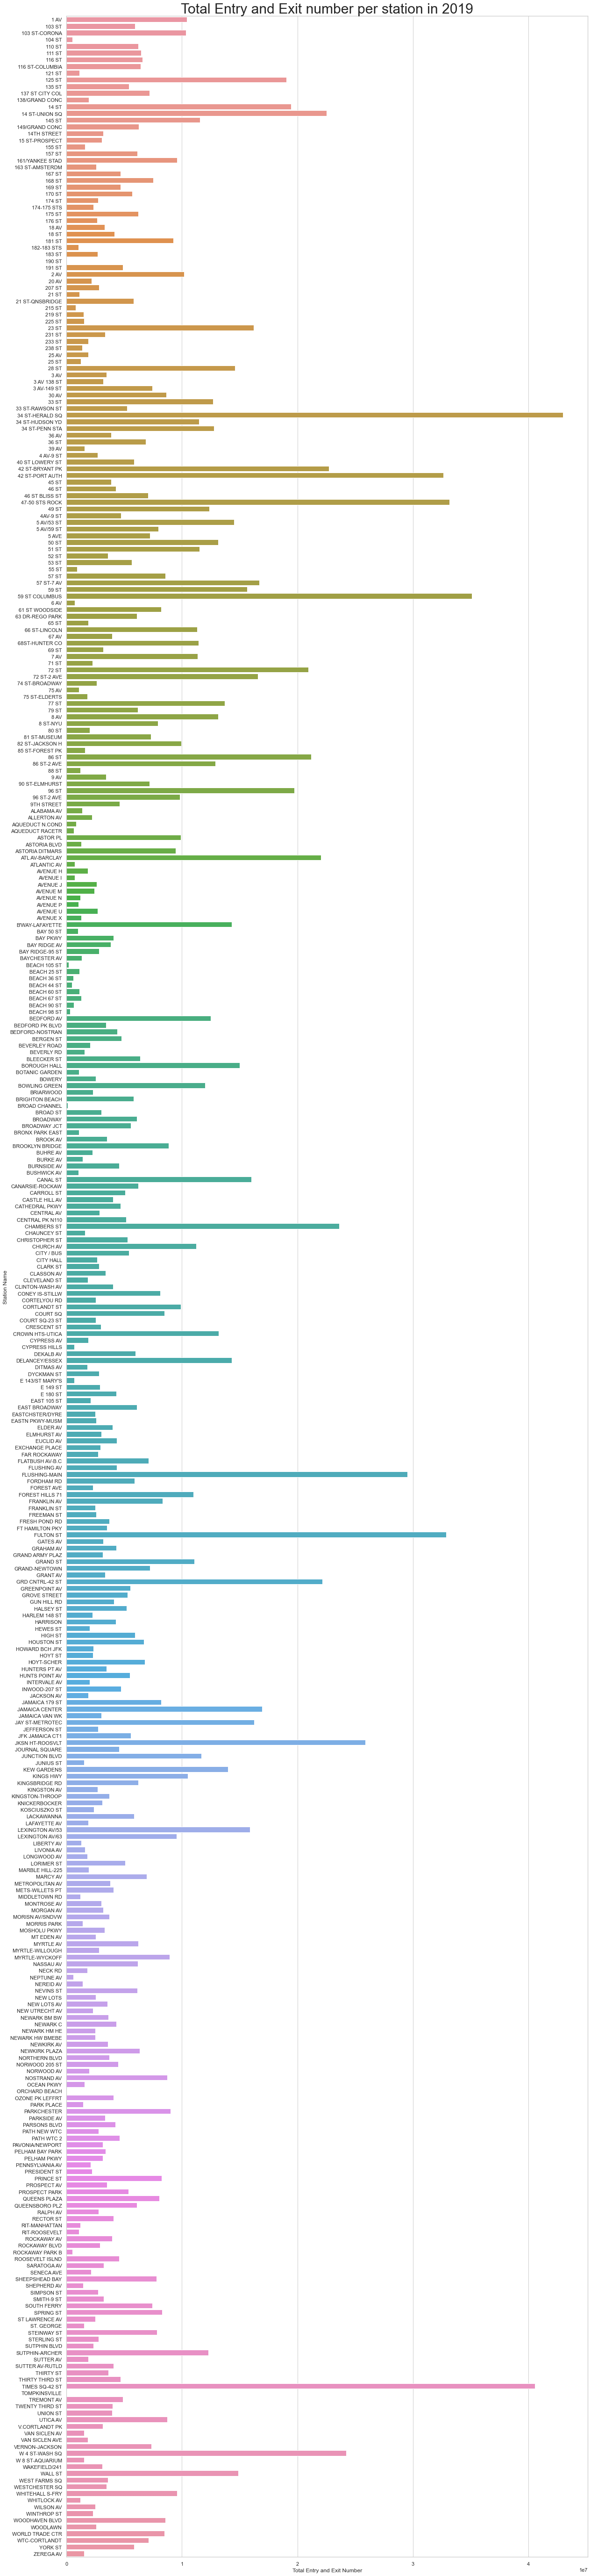

In [26]:
# Visualize 2019 Data by drawing barplot for total entry and exit number per station
df_2019 = total_count_per_station_2019.toPandas()
plt.rcParams['figure.figsize'] = [20, 100]
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
graph_2019 = sns.barplot(x="Total_Entry_And_Exit", y="Station", data=df_2019)
graph_2019.set_title("Total Entry and Exit number per station in 2019", fontsize=30)
graph_2019.set(ylabel="Station Name", xlabel="Total Entry and Exit Number")
plt.savefig("total_number_per_station_2019.png")

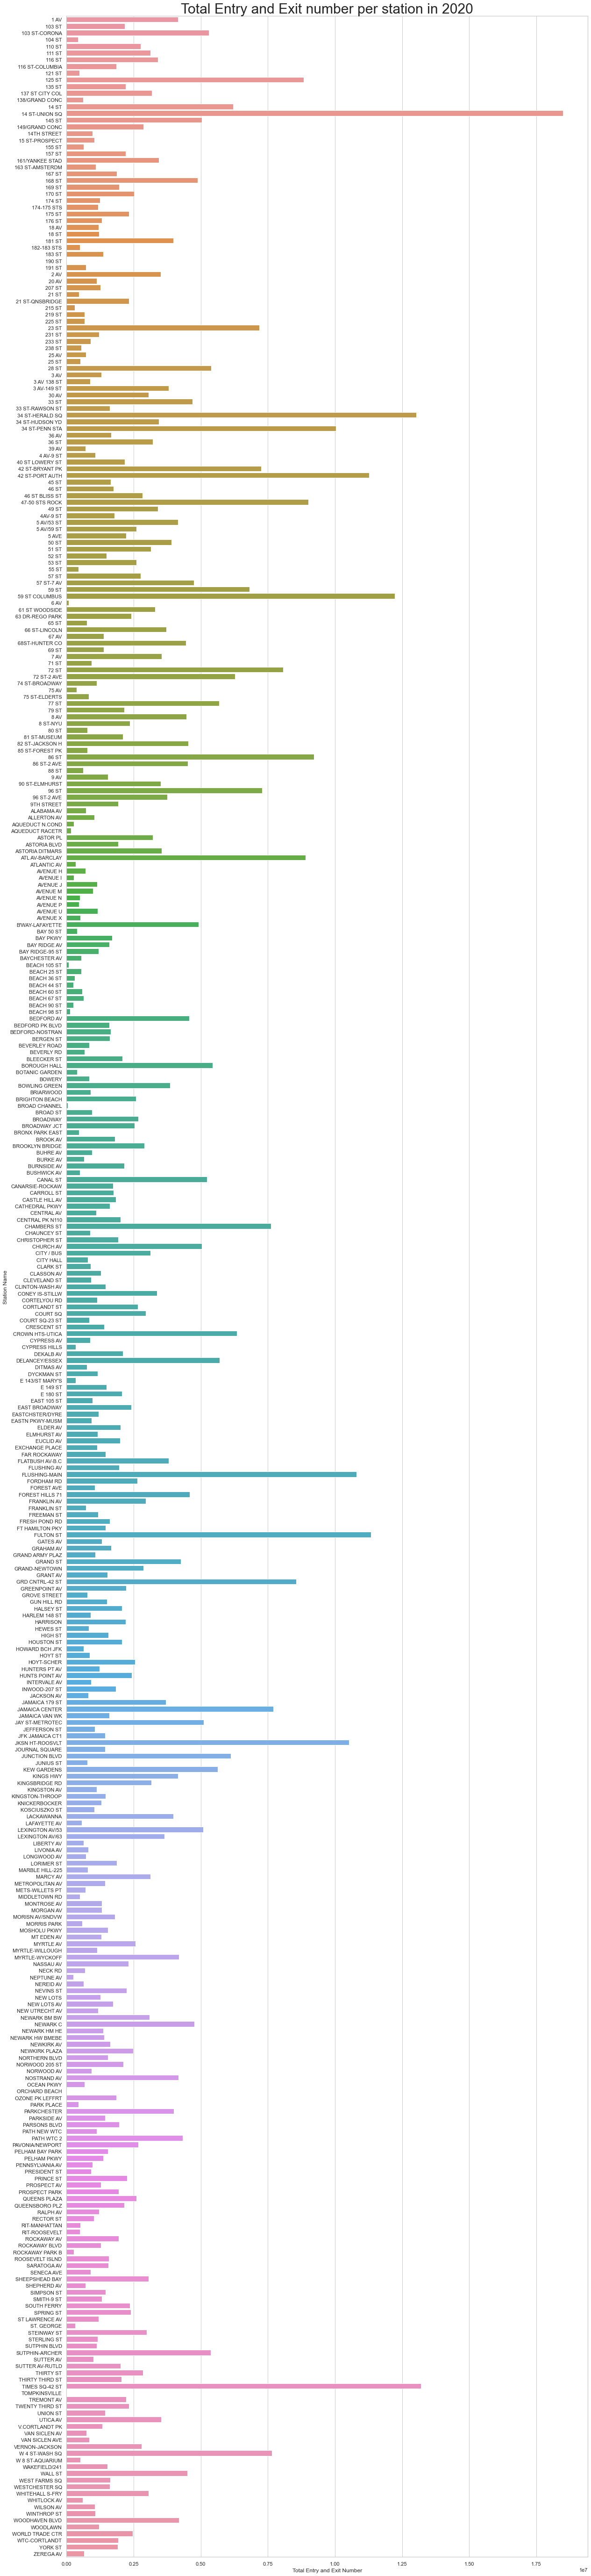

In [27]:
# Visualize 2020 Data by drawing barplot for total entry and exit number per station
df_2020 = total_count_per_station_2020.toPandas()
plt.rcParams['figure.figsize'] = [20, 100]
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
graph_2020 = sns.barplot(x="Total_Entry_And_Exit", y="Station", data=df_2020)
graph_2020.set_title("Total Entry and Exit number per station in 2020", fontsize=30)
graph_2020.set(ylabel="Station Name", xlabel="Total Entry and Exit Number")
plt.savefig("total_number_per_station_2020.png")

In [30]:
# Calculate the difference between total_entry_and_exit 2019 and 2020
tmp_total_per_station_2019 = total_count_per_station_2019.select(f.col("Station"), f.col("Total_Entry_And_Exit").alias("Total_2019"))
tmp_total_per_station_2020 = total_count_per_station_2020.select(f.col("Station"), f.col("Total_Entry_And_Exit").alias("Total_2020"))

entry_and_exit_diff = tmp_total_per_station_2019.join(tmp_total_per_station_2020, "Station", "left").sort("Station")
entry_and_exit_diff = entry_and_exit_diff.withColumn("Total_Diff", f.col("Total_2020")-f.col("Total_2019"))
entry_and_exit_diff.show()

+---------------+----------+----------+----------+
|        Station|Total_2019|Total_2020|Total_Diff|
+---------------+----------+----------+----------+
|           1 AV|  10414678|   4155263|  -6259415|
|         103 ST|   5925449|   2163917|  -3761532|
|  103 ST-CORONA|  10356042|   5310855|  -5045187|
|         104 ST|    515023|    435070|    -79953|
|         110 ST|   6216656|   2755225|  -3461431|
|         111 ST|   6465017|   3135855|  -3329162|
|         116 ST|   6567308|   3408496|  -3158812|
|116 ST-COLUMBIA|   6420276|   1853100|  -4567176|
|         121 ST|   1127728|    483294|   -644434|
|         125 ST|  19067198|   8836329| -10230869|
|         135 ST|   5408083|   2205583|  -3202500|
|137 ST CITY COL|   7204701|   3172314|  -4032387|
| 138/GRAND CONC|   1930883|    621701|  -1309182|
|          14 ST|  19466814|   6209569| -13257245|
| 14 ST-UNION SQ|  22515854|  18493549|  -4022305|
|         145 ST|  11550843|   5043717|  -6507126|
| 149/GRAND CONC|   6243419|   

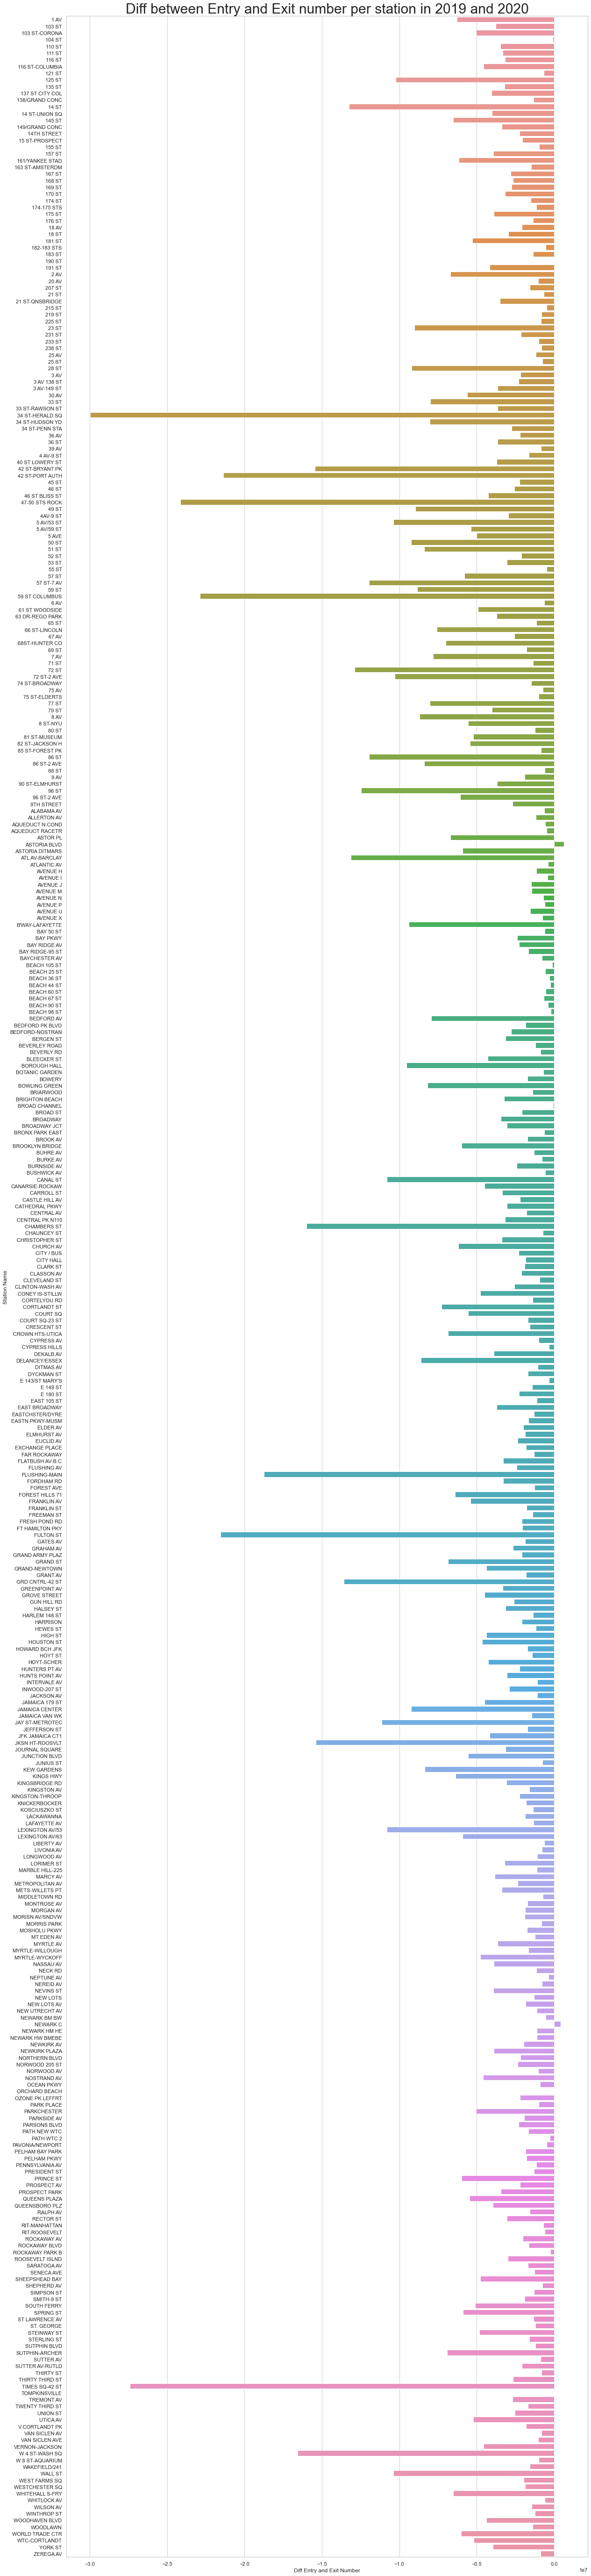

In [31]:
# Visualize Diff by drawing barplot for diff entry and exit number per station
df_diff = entry_and_exit_diff.toPandas()
plt.rcParams['figure.figsize'] = [20, 100]
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
graph_diff = sns.barplot(x="Total_Diff", y="Station", data=df_diff)
graph_diff.set_title("Diff between Entry and Exit number per station in 2019 and 2020", fontsize=30)
graph_diff.set(ylabel="Station Name", xlabel="Diff Entry and Exit Number")
plt.savefig("diff_number_per_station.png")

In [34]:
total_count_2019 = total_count_per_station_2019.agg(f.sum("Total_Entry"), f.sum("Total_Exit"), f.sum("Total_Entry_And_Exit"))
total_count_2019 = total_count_2019.select(f.col("sum(Total_Entry)").alias("Total_Entry"), f.col("sum(Total_Exit)").alias("Total_Exit"), f.col("sum(Total_Entry_And_Exit)").alias("Total_Entry_And_Exit"))
total_count_2019 = total_count_2019.withColumn("Year", f.lit("2019"))
total_count_2019.printSchema()

root
 |-- Total_Entry: long (nullable = true)
 |-- Total_Exit: long (nullable = true)
 |-- Total_Entry_And_Exit: long (nullable = true)
 |-- Year: string (nullable = false)



In [35]:
total_count_2019.show()

+-----------+----------+--------------------+----+
|Total_Entry|Total_Exit|Total_Entry_And_Exit|Year|
+-----------+----------+--------------------+----+
| 1261474848| 996427525|          2257902373|2019|
+-----------+----------+--------------------+----+



In [36]:
total_count_2020 = total_count_per_station_2020.agg(f.sum("Total_Entry"), f.sum("Total_Exit"), f.sum("Total_Entry_And_Exit"))
total_count_2020 = total_count_2020.select(f.col("sum(Total_Entry)").alias("Total_Entry"), f.col("sum(Total_Exit)").alias("Total_Exit"), f.col("sum(Total_Entry_And_Exit)").alias("Total_Entry_And_Exit"))
total_count_2020 = total_count_2020.withColumn("Year", f.lit("2020"))
total_count_2020.printSchema()

root
 |-- Total_Entry: long (nullable = true)
 |-- Total_Exit: long (nullable = true)
 |-- Total_Entry_And_Exit: long (nullable = true)
 |-- Year: string (nullable = false)



In [37]:
total_count_2020.show()

+-----------+----------+--------------------+----+
|Total_Entry|Total_Exit|Total_Entry_And_Exit|Year|
+-----------+----------+--------------------+----+
|  470829872| 423139245|           893969117|2020|
+-----------+----------+--------------------+----+



In [38]:
total_count = total_count_2019.union(total_count_2020)
total_count.show()

+-----------+----------+--------------------+----+
|Total_Entry|Total_Exit|Total_Entry_And_Exit|Year|
+-----------+----------+--------------------+----+
| 1261474848| 996427525|          2257902373|2019|
|  470829872| 423139245|           893969117|2020|
+-----------+----------+--------------------+----+



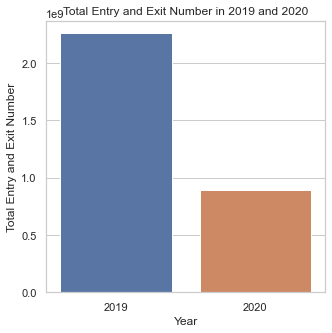

In [43]:
# Draw barplot for total entry and exit number among all the station in 2019 and 2020
df_total_count = total_count.toPandas()
plt.rcParams['figure.figsize'] = [5, 5]
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
graph_entry_and_exit = sns.barplot(x="Year", y="Total_Entry_And_Exit", data=df_total_count)
graph_entry_and_exit.set_title("Total Entry and Exit Number in 2019 and 2020")
graph_entry_and_exit.set(xlabel="Year", ylabel="Total Entry and Exit Number")
plt.savefig("cmp_total_number.png")

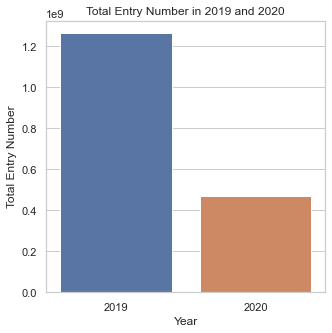

In [44]:
graph_entry = sns.barplot(x="Year", y="Total_Entry", data=df_total_count)
graph_entry.set_title("Total Entry Number in 2019 and 2020")
graph_entry.set(xlabel="Year", ylabel="Total Entry Number")
plt.savefig("cmp_total_entry_number.png")

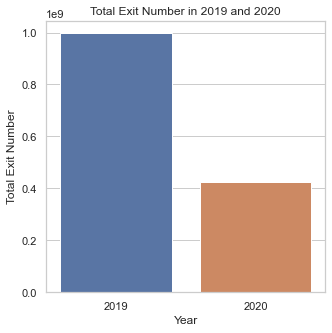

In [45]:
graph_exit = sns.barplot(x="Year", y="Total_Exit", data=df_total_count)
graph_exit.set_title("Total Exit Number in 2019 and 2020")
graph_exit.set(xlabel="Year", ylabel="Total Exit Number")
plt.savefig("cmp_total_exit_number.png")

In [46]:
# Station -> Latitude and Longitude Data
station_location = spark.read.format("csv").options(header="true", inferschema="true").load("Stations.csv")
station_location.printSchema()

root
 |-- Station ID: integer (nullable = true)
 |-- Complex ID: integer (nullable = true)
 |-- GTFS Stop ID: string (nullable = true)
 |-- Division: string (nullable = true)
 |-- Line: string (nullable = true)
 |-- Stop Name: string (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Daytime Routes: string (nullable = true)
 |-- Structure: string (nullable = true)
 |-- GTFS Latitude: double (nullable = true)
 |-- GTFS Longitude: double (nullable = true)
 |-- North Direction Label: string (nullable = true)
 |-- South Direction Label: string (nullable = true)
 |-- ADA: integer (nullable = true)
 |-- ADA Notes: string (nullable = true)



In [47]:
location = station_location.select(f.upper(f.col("Stop Name")).alias("Station"), f.col("GTFS Latitude").alias("Latitude"), f.col("GTFS Longitude").alias("Longitude"))
location.show()

+--------------------+---------+----------+
|             Station| Latitude| Longitude|
+--------------------+---------+----------+
|ASTORIA-DITMARS BLVD|40.775036|-73.912034|
|        ASTORIA BLVD|40.770258|-73.917843|
|               30 AV|40.766779|-73.921479|
|            BROADWAY| 40.76182|-73.925508|
|               36 AV|40.756804|-73.929575|
|   39 AV-DUTCH KILLS|40.752882|-73.932755|
|  LEXINGTON AV/59 ST| 40.76266|-73.967258|
|          5 AV/59 ST|40.764811|-73.973347|
|          57 ST-7 AV|40.764664|-73.980658|
|               49 ST|40.759901|-73.984139|
|      TIMES SQ-42 ST|40.754672|-73.986754|
|     34 ST-HERALD SQ|40.749567| -73.98795|
|               28 ST|40.745494|-73.988691|
|               23 ST|40.741303|-73.989344|
|      14 ST-UNION SQ|40.735736|-73.990568|
|            8 ST-NYU|40.730328|-73.992629|
|           PRINCE ST|40.724329|-73.997702|
|            CANAL ST|40.719527|-74.001775|
|            CANAL ST|40.718383| -74.00046|
|           CITY HALL|40.713282|

In [87]:
entry_and_exit_diff.show()

+---------------+----------+----------+----------+
|        Station|Total_2019|Total_2020|Total_Diff|
+---------------+----------+----------+----------+
|           1 AV|  10414678|   4155263|  -6259415|
|         103 ST|   5925449|   2163917|  -3761532|
|  103 ST-CORONA|  10356042|   5310855|  -5045187|
|         104 ST|    515023|    435070|    -79953|
|         110 ST|   6216656|   2755225|  -3461431|
|         111 ST|   6465017|   3135855|  -3329162|
|         116 ST|   6567308|   3408496|  -3158812|
|116 ST-COLUMBIA|   6420276|   1853100|  -4567176|
|         121 ST|   1127728|    483294|   -644434|
|         125 ST|  19067198|   8836329| -10230869|
|         135 ST|   5408083|   2205583|  -3202500|
|137 ST CITY COL|   7204701|   3172314|  -4032387|
| 138/GRAND CONC|   1930883|    621701|  -1309182|
|          14 ST|  19466814|   6209569| -13257245|
| 14 ST-UNION SQ|  22515854|  18493549|  -4022305|
|         145 ST|  11550843|   5043717|  -6507126|
| 149/GRAND CONC|   6243419|   

In [88]:
station_with_location = entry_and_exit_diff.join(location, "Station", "left")
station_with_location.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Total_2019: long (nullable = true)
 |-- Total_2020: long (nullable = true)
 |-- Total_Diff: long (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)



In [89]:
station_with_location.show()

+---------------+----------+----------+----------+---------+----------+
|        Station|Total_2019|Total_2020|Total_Diff| Latitude| Longitude|
+---------------+----------+----------+----------+---------+----------+
|      NEVINS ST|   6154516|   2236520|  -3917996|40.688246|-73.980492|
|       UTICA AV|   8729004|   3522176|  -5206828|40.679364|-73.930729|
|           2 AV|  10197291|   3510211|  -6687080|40.723402|-73.989938|
|    3 AV 138 ST|   3175154|    879740|  -2295414|     null|      null|
|         111 ST|   6465017|   3135855|  -3329162| 40.75173|-73.855334|
|         111 ST|   6465017|   3135855|  -3329162|40.684331|-73.832163|
|         111 ST|   6465017|   3135855|  -3329162|40.697418|-73.836345|
|    BEACH 36 ST|    611751|    309558|   -302193|40.595398|-73.768175|
|  CYPRESS HILLS|    686611|    346799|   -339812|40.689941| -73.87255|
|  NEWKIRK PLAZA|   6351252|   2477541|  -3873711|40.635082|-73.962793|
|    3 AV-149 ST|   7449182|   3808654|  -3640528|40.816109|-73.

In [90]:
station_with_location.count()

478

In [91]:
station_with_location = station_with_location.drop_duplicates()
station_with_location.count()

476

In [92]:
df_station_with_location = station_with_location.toPandas()

<Figure size 1152x1152 with 0 Axes>

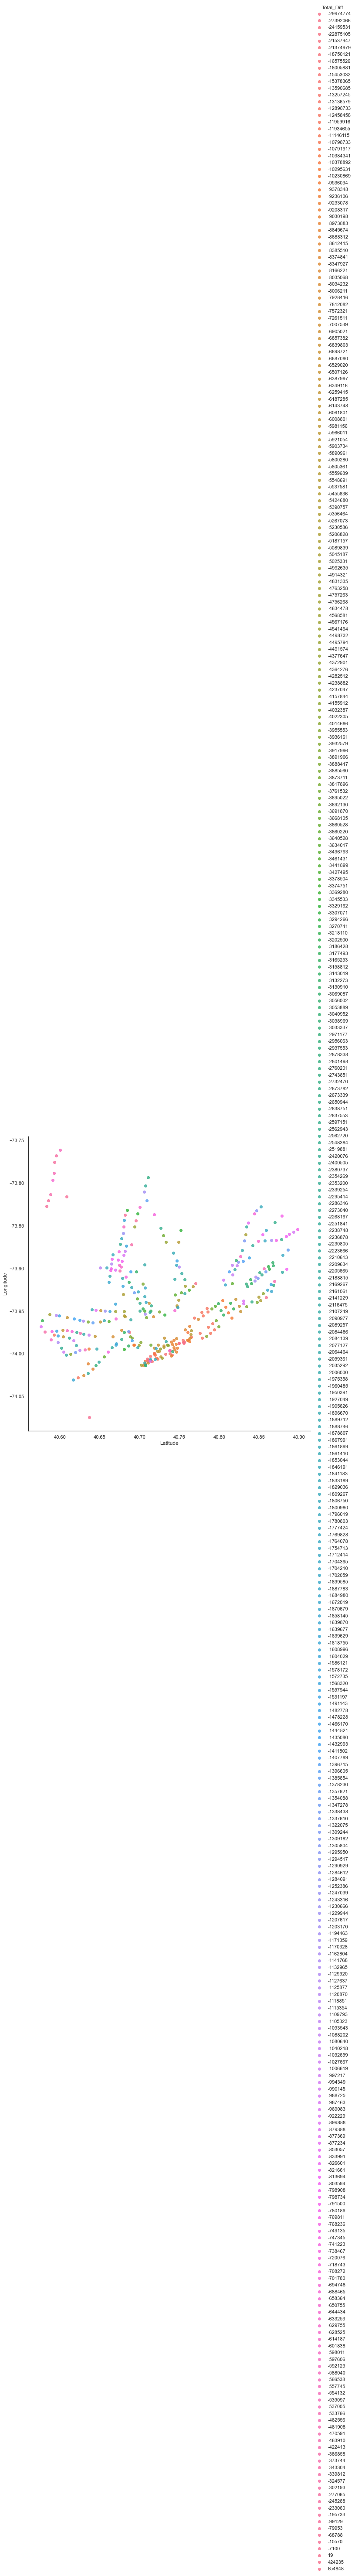

In [94]:
sns.set(style='white', context='notebook', palette='deep')
plt.figure(figsize=(16,16))
graph_df_station = sns.lmplot(x='Latitude', y='Longitude', height=10, hue='Total_Diff', data=df_station_with_location, fit_reg=False)
plt.savefig("HeatMap.png")
# plt.show()

In [57]:
# Monthly Entry and Exit Data per station
result_monthly_2019 = "Result/Turnstile Month 2019/turnstile_month_2019.csv"
result_monthly_2020 = "Result/Turnstile Month 2020/turnstile_month_2020.csv"

In [58]:
monthly_entry_and_exit_per_station_2019 = spark.read.format("csv").options(header="true", inferschema="true").load(result_monthly_2019)
monthly_entry_and_exit_per_station_2019.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Entries Month: integer (nullable = true)
 |-- Exits Month: double (nullable = true)



In [59]:
monthly_entry_and_exit_per_station_2019.count()

4510

In [60]:
monthly_entry_and_exit_per_station_2019.show()

+-------+-----+-------------+-----------+
|Station|Month|Entries Month|Exits Month|
+-------+-----+-------------+-----------+
|   1 AV|    1|       553395|   628004.0|
|   1 AV|    2|       272496|   308305.0|
|   1 AV|    3|       421835|   461699.0|
|   1 AV|    4|       523097|   586247.0|
|   1 AV|    5|       474714|   540781.0|
|   1 AV|    6|       320863|   358469.0|
|   1 AV|    7|       422904|   475232.0|
|   1 AV|    8|       291362|   330751.0|
|   1 AV|    9|       408081|   453510.0|
|   1 AV|   10|       448920|   493346.0|
|   1 AV|   11|       412357|   458613.0|
|   1 AV|   12|       360123|   409574.0|
| 103 ST|    1|       303093|   205415.0|
| 103 ST|    2|       296997|   191862.0|
| 103 ST|    3|       310721|   207847.0|
| 103 ST|    4|       322303|   213004.0|
| 103 ST|    5|       337376|   222577.0|
| 103 ST|    6|       277840|   182222.0|
| 103 ST|    7|       257391|   171409.0|
| 103 ST|    8|       294220|   200261.0|
+-------+-----+-------------+-----

In [61]:
monthly_entry_and_exit_per_station_2020 = spark.read.format("csv").options(header="true", inferschema="true").load(result_monthly_2020)
monthly_entry_and_exit_per_station_2020.printSchema()

root
 |-- Station: string (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Entries Month: integer (nullable = true)
 |-- Exits Month: double (nullable = true)



In [62]:
monthly_entry_and_exit_per_station_2020.count()

4127

In [63]:
monthly_entry_and_exit_per_station_2020.show()

+-------+-----+-------------+-----------+
|Station|Month|Entries Month|Exits Month|
+-------+-----+-------------+-----------+
|   1 AV|    1|       420842|   482152.0|
|   1 AV|    2|       371827|   449104.0|
|   1 AV|    3|       190468|   258862.0|
|   1 AV|    4|        30892|    51713.0|
|   1 AV|    5|        43763|    69267.0|
|   1 AV|    6|        83009|   124027.0|
|   1 AV|    7|       121300|   172407.0|
|   1 AV|    8|       103818|   143678.0|
|   1 AV|    9|       174052|   235169.0|
|   1 AV|   10|       162199|   219708.0|
|   1 AV|   11|       104579|   142427.0|
| 103 ST|    1|       290578|   173480.0|
| 103 ST|    2|       250265|   149478.0|
| 103 ST|    3|       158091|   115262.0|
| 103 ST|    4|        37726|    30345.0|
| 103 ST|    5|        44955|    36759.0|
| 103 ST|    6|        62294|    51804.0|
| 103 ST|    7|        75111|    67925.0|
| 103 ST|    8|        77565|    72082.0|
| 103 ST|    9|        92847|    89142.0|
+-------+-----+-------------+-----

In [64]:
monthly_entry_and_exit_2019 = monthly_entry_and_exit_per_station_2019.groupBy("Month").agg(f.sum(f.col("Entries Month")).alias("EntryMonth"), f.sum(f.col("Exits Month")).cast("long").alias("ExitMonth"))
monthly_entry_and_exit_2019 = monthly_entry_and_exit_2019.withColumn("Year", f.lit("2019")).withColumn("Total", f.col("EntryMonth")+f.col("ExitMonth")).sort("Month")
monthly_entry_and_exit_2019.printSchema()

root
 |-- Month: integer (nullable = true)
 |-- EntryMonth: long (nullable = true)
 |-- ExitMonth: long (nullable = true)
 |-- Year: string (nullable = false)
 |-- Total: long (nullable = true)



In [65]:
monthly_entry_and_exit_2019.count()

12

In [66]:
monthly_entry_and_exit_2019.show()

+-----+----------+---------+----+---------+
|Month|EntryMonth|ExitMonth|Year|    Total|
+-----+----------+---------+----+---------+
|    1| 108059229| 84178062|2019|192237291|
|    2|  84584233| 65036952|2019|149621185|
|    3| 104713378| 81538599|2019|186251977|
|    4| 112157658| 87369843|2019|199527501|
|    5| 115044263| 89919638|2019|204963901|
|    6|  92342364| 73337807|2019|165680171|
|    7| 115045027| 93434887|2019|208479914|
|    8|  91654958| 73848514|2019|165503472|
|    9| 113356289| 90045755|2019|203402044|
|   10| 122588607| 97188322|2019|219776929|
|   11| 109500519| 87241880|2019|196742399|
|   12|  92428323| 73287266|2019|165715589|
+-----+----------+---------+----+---------+



In [67]:
monthly_entry_and_exit_2020 = monthly_entry_and_exit_per_station_2020.groupBy("Month").agg(f.sum(f.col("Entries Month")).alias("EntryMonth"), f.sum(f.col("Exits Month")).cast("long").alias("ExitMonth"))
monthly_entry_and_exit_2020 = monthly_entry_and_exit_2020.withColumn("Year", f.lit("2020")).withColumn("Total", f.col("EntryMonth")+f.col("ExitMonth")).sort("Month")
monthly_entry_and_exit_2020.printSchema()

root
 |-- Month: integer (nullable = true)
 |-- EntryMonth: long (nullable = true)
 |-- ExitMonth: long (nullable = true)
 |-- Year: string (nullable = false)
 |-- Total: long (nullable = true)



In [68]:
monthly_entry_and_exit_2020.count()

11

In [69]:
monthly_entry_and_exit_2020.show()

+-----+----------+---------+----+---------+
|Month|EntryMonth|ExitMonth|Year|    Total|
+-----+----------+---------+----+---------+
|    1| 108944550| 88213087|2020|197157637|
|    2| 102673868| 82885602|2020|185559470|
|    3|  59403175| 49739631|2020|109142806|
|    4|  12501569| 12439372|2020| 24940941|
|    5|  15299234| 15512281|2020| 30811515|
|    6|  21263265| 22006562|2020| 43269827|
|    7|  27328358| 28276992|2020| 55605350|
|    8|  27951737| 29256435|2020| 57208172|
|    9|  36121496| 35557684|2020| 71679180|
|   10|  35795283| 35497902|2020| 71293185|
|   11|  23547337| 23753697|2020| 47301034|
+-----+----------+---------+----+---------+



In [70]:
monthly_entry_and_exit = monthly_entry_and_exit_2019.union(monthly_entry_and_exit_2020)
monthly_entry_and_exit.show(23)

+-----+----------+---------+----+---------+
|Month|EntryMonth|ExitMonth|Year|    Total|
+-----+----------+---------+----+---------+
|    1| 108059229| 84178062|2019|192237291|
|    2|  84584233| 65036952|2019|149621185|
|    3| 104713378| 81538599|2019|186251977|
|    4| 112157658| 87369843|2019|199527501|
|    5| 115044263| 89919638|2019|204963901|
|    6|  92342364| 73337807|2019|165680171|
|    7| 115045027| 93434887|2019|208479914|
|    8|  91654958| 73848514|2019|165503472|
|    9| 113356289| 90045755|2019|203402044|
|   10| 122588607| 97188322|2019|219776929|
|   11| 109500519| 87241880|2019|196742399|
|   12|  92428323| 73287266|2019|165715589|
|    1| 108944550| 88213087|2020|197157637|
|    2| 102673868| 82885602|2020|185559470|
|    3|  59403175| 49739631|2020|109142806|
|    4|  12501569| 12439372|2020| 24940941|
|    5|  15299234| 15512281|2020| 30811515|
|    6|  21263265| 22006562|2020| 43269827|
|    7|  27328358| 28276992|2020| 55605350|
|    8|  27951737| 29256435|2020

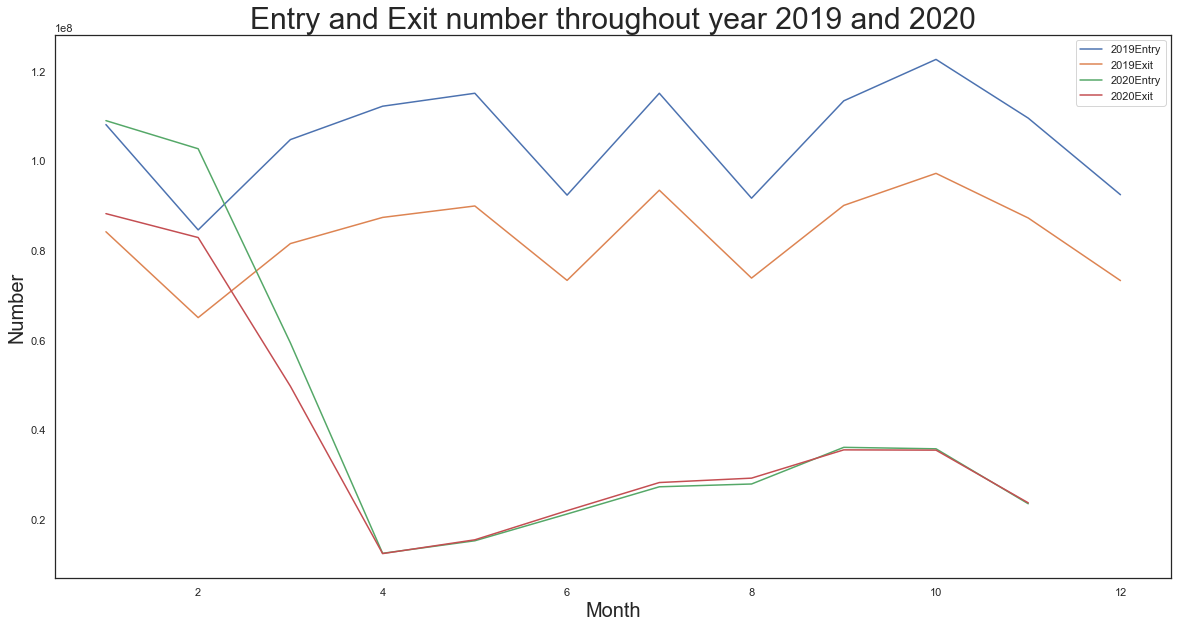

In [84]:
# Plot the line graph for entry and exit number throughout year 2019 and 2020

Year = ["2019", "2020"]
fig, ax = plt.subplots(figsize=(20,10))

for y in Year:
    df = monthly_entry_and_exit.where(f.col("Year") == y)
    df = df.toPandas()
    ax = df.plot(ax=ax, kind="line", x="Month", y="EntryMonth", label=y+"Entry", legend=False)
    ax = df.plot(ax=ax, kind="line", x="Month", y="ExitMonth", label=y+"Exit", legend=False)
#     ax = df.plot(ax=ax, kind="line", x="Month", y="Total", label=y+"Total", legend=False)

ax.set_title("Entry and Exit number throughout year 2019 and 2020", fontsize=30)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Number", fontsize=20)
ax.legend(loc='best')

plt.savefig("entry_exit_trend.png")

In [76]:
# Covid Case, Hospitalized, and Death Data per month
covid_result_2020 = "Result/Covid Month 2020/covid_month.csv"
covid_2020 = spark.read.format("csv").options(header="true", inferschema="true").load(covid_result_2020)
covid_2020.printSchema()

root
 |-- MONTH_OF_INTERSET: integer (nullable = true)
 |-- CASE_COUNT: integer (nullable = true)
 |-- HOSPITALIZED_COUNT: integer (nullable = true)
 |-- DEATH_COUNT: double (nullable = true)



In [77]:
covid_2020.count()

9

In [78]:
covid_2020.show()

+-----------------+----------+------------------+-----------+
|MONTH_OF_INTERSET|CASE_COUNT|HOSPITALIZED_COUNT|DEATH_COUNT|
+-----------------+----------+------------------+-----------+
|                3|     65189|             18060|     2191.0|
|                4|    109314|             29694|    12734.0|
|                5|     28459|              4270|     2830.0|
|                6|     10883|              1594|      760.0|
|                7|      9829|              1178|      342.0|
|                8|      7470|               970|      144.0|
|                9|     10356|               915|      134.0|
|               10|     16810|              1527|      161.0|
|               11|     30702|              2004|      237.0|
+-----------------+----------+------------------+-----------+



In [79]:
covid_2020 = covid_2020.select(f.col("MONTH_OF_INTERSET"), f.col("CASE_COUNT"), f.col("HOSPITALIZED_COUNT"), f.col("DEATH_COUNT").cast("integer"))
covid_2020.printSchema()

root
 |-- MONTH_OF_INTERSET: integer (nullable = true)
 |-- CASE_COUNT: integer (nullable = true)
 |-- HOSPITALIZED_COUNT: integer (nullable = true)
 |-- DEATH_COUNT: integer (nullable = true)



In [80]:
covid_2020.show()

+-----------------+----------+------------------+-----------+
|MONTH_OF_INTERSET|CASE_COUNT|HOSPITALIZED_COUNT|DEATH_COUNT|
+-----------------+----------+------------------+-----------+
|                3|     65189|             18060|       2191|
|                4|    109314|             29694|      12734|
|                5|     28459|              4270|       2830|
|                6|     10883|              1594|        760|
|                7|      9829|              1178|        342|
|                8|      7470|               970|        144|
|                9|     10356|               915|        134|
|               10|     16810|              1527|        161|
|               11|     30702|              2004|        237|
+-----------------+----------+------------------+-----------+



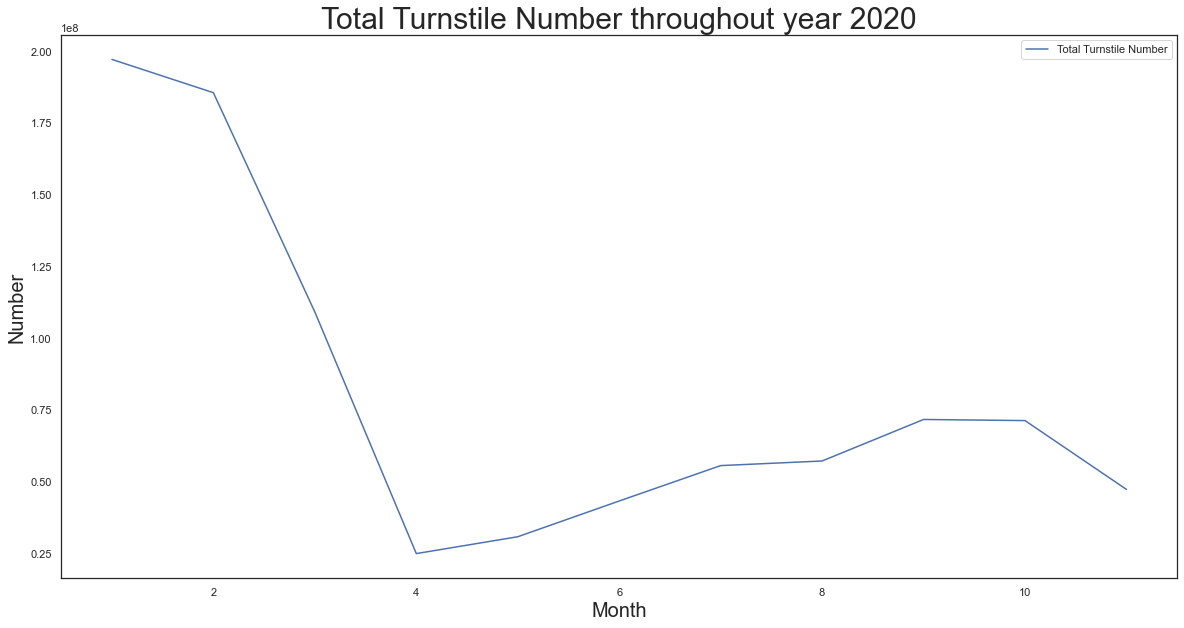

In [85]:
# Plot the line graph for entry and exit number throughout year 2019 and 2020, and total case, hospitalized, death count

fig, ax = plt.subplots(figsize=(20,10))
turnstile_df = monthly_entry_and_exit_2020.toPandas()
ax = turnstile_df.plot(ax=ax, kind="line", x="Month", y="Total", label="Total Turnstile Number", legend=False)

# covid_df = covid_2020.toPandas()
# ax = covid_df.plot(ax=ax, kind="line", x="MONTH_OF_INTERSET", y="CASE_COUNT", label="Total Case Number", legend=False)
# ax = covid_df.plot(ax=ax, kind="line", x="MONTH_OF_INTERSET", y="HOSPITALIZED_COUNT", label="Total Hospitalized Number", legend=False)
# ax = covid_df.plot(ax=ax, kind="line", x="MONTH_OF_INTERSET", y="DEATH_COUNT", label="Total Death Number", legend=False)

ax.set_title("Total Turnstile Number throughout year 2020", fontsize=30)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Number", fontsize=20)
ax.legend(loc='best')

plt.savefig("turnstile_trend.png")

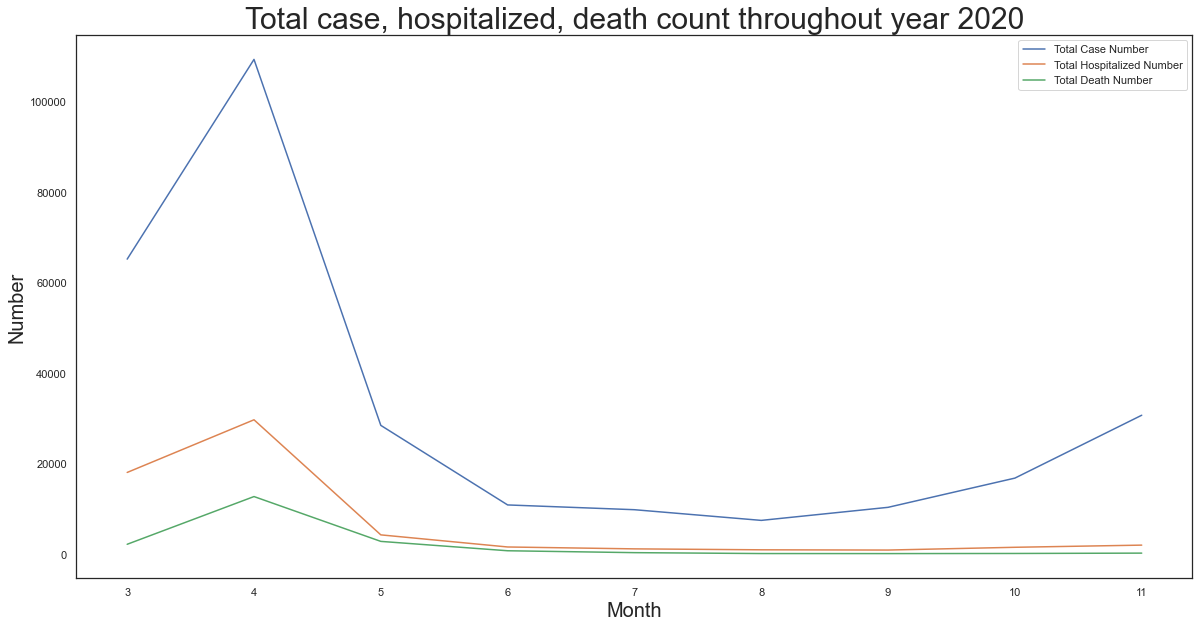

In [86]:
fig, ax = plt.subplots(figsize=(20,10))

covid_df = covid_2020.toPandas()
ax = covid_df.plot(ax=ax, kind="line", x="MONTH_OF_INTERSET", y="CASE_COUNT", label="Total Case Number", legend=False)
ax = covid_df.plot(ax=ax, kind="line", x="MONTH_OF_INTERSET", y="HOSPITALIZED_COUNT", label="Total Hospitalized Number", legend=False)
ax = covid_df.plot(ax=ax, kind="line", x="MONTH_OF_INTERSET", y="DEATH_COUNT", label="Total Death Number", legend=False)

ax.set_title("Total case, hospitalized, death count throughout year 2020", fontsize=30)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Number", fontsize=20)
ax.legend(loc='best')

plt.savefig("covid_trend.png")